# BMI Projekt 1 - English
This notebook is for assistance with the coding for many of the questions in the project.
The sections are marked with the corresponding question in the Project description.
Remember, this code is provided to get started with the project, but the code is not complete for answering the corresponding questions

#### Initialize python packages

In [353]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm

#### Read data

In [332]:
# Path to data file (insert your own path)
file_path = '/Users/rashe/OneDrive/Desktop/MedTech/5. semester/02402 Statistics/Projects/bmi/bmi1_data.csv'
# Load data
D = pd.read_csv(file_path, sep=';')
print(D)

     height  weight  gender  urbanity  fastfood
0       180      80       1         5      24.0
1       185      98       1         1       6.0
2       180      80       1         5       6.0
3       168      60       0         4      24.0
4       173      83       1         5      24.0
..      ...     ...     ...       ...       ...
140     162      69       0         2       6.0
141     174      73       1         5     182.5
142     170      70       0         4       6.0
143     178      56       0         5       1.0
144     163     105       0         3       0.0

[145 rows x 5 columns]


#### a) Simple summary of data

In [333]:
print("Dimensions of data frame (number of rows and columns): ", D.shape)
print("Column/variable names: ", D.columns)
print("First 5 rows of D:") # (\n means new line)
display(D.head())
print("Last 5 rows of D:")
display(D.tail())
print("Description of D:")
display(D.describe())
print("Types of variables:\n", D.dtypes)


Dimensions of data frame (number of rows and columns):  (145, 5)
Column/variable names:  Index(['height', 'weight', 'gender', 'urbanity', 'fastfood'], dtype='object')
First 5 rows of D:


,height,weight,gender,urbanity,fastfood
0,180,80,1,5,24.0
1,185,98,1,1,6.0
2,180,80,1,5,6.0
3,168,60,0,4,24.0
4,173,83,1,5,24.0


Last 5 rows of D:


,height,weight,gender,urbanity,fastfood
140,162,69,0,2,6.0
141,174,73,1,5,182.5
142,170,70,0,4,6.0
143,178,56,0,5,1.0
144,163,105,0,3,0.0


Description of D:


,height,weight,gender,urbanity,fastfood
count,145.000000,145.000000,145.000000,145.000000,145.000000
mean,173.903448,76.737931,0.503448,3.668966,21.037241
std,9.328365,15.208286,0.501721,1.374647,40.321484
min,154.000000,50.000000,0.000000,1.000000,0.000000
25%,166.000000,65.000000,0.000000,3.000000,6.000000
50%,173.000000,75.000000,1.000000,4.000000,6.000000
75%,182.000000,87.000000,1.000000,5.000000,24.000000
max,196.000000,130.000000,1.000000,5.000000,365.000000


Types of variables:
 height        int64
weight        int64
gender        int64
urbanity      int64
fastfood    float64
dtype: object


#### Calculate BMI

In [334]:
# Calculate BMI and add to data frame D
D['bmi'] = D['weight'] / (D['height']/100)**2
print(D)
display(D.describe())


     height  weight  gender  urbanity  fastfood        bmi
0       180      80       1         5      24.0  24.691358
1       185      98       1         1       6.0  28.634039
2       180      80       1         5       6.0  24.691358
3       168      60       0         4      24.0  21.258503
4       173      83       1         5      24.0  27.732300
..      ...     ...     ...       ...       ...        ...
140     162      69       0         2       6.0  26.291724
141     174      73       1         5     182.5  24.111507
142     170      70       0         4       6.0  24.221453
143     178      56       0         5       1.0  17.674536
144     163     105       0         3       0.0  39.519741

[145 rows x 6 columns]


,height,weight,gender,urbanity,fastfood,bmi
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,173.903448,76.737931,0.503448,3.668966,21.037241,25.247948
std,9.328365,15.208286,0.501721,1.374647,40.321484,3.832243
min,154.000000,50.000000,0.000000,1.000000,0.000000,17.577069
25%,166.000000,65.000000,0.000000,3.000000,6.000000,22.589551
50%,173.000000,75.000000,1.000000,4.000000,6.000000,24.691358
75%,182.000000,87.000000,1.000000,5.000000,24.000000,27.636054
max,196.000000,130.000000,1.000000,5.000000,365.000000,39.519741


#### b) Histogram (Empirical density)

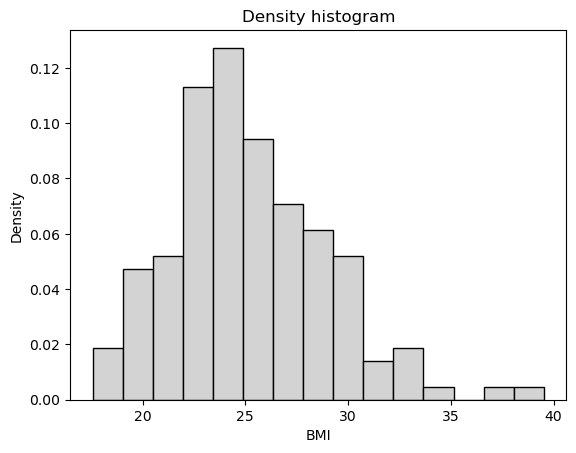

In [335]:
# Histogram describing the empirical density of BMI
# (histogram for BMI normalized so that the area is 1)
plt.hist(D['bmi'], bins=15,density=True, color = 'lightgray', edgecolor = 'black')
plt.xlabel('BMI')
plt.ylabel('Density')
plt.title('Density histogram')
plt.show()


#### Data subsets (men and women seperate)

In [336]:
# Split data into two sub data sets (men and women)
D_female = D[D['gender']==0]
D_male = D[D['gender']==1]

#### c) Density Histograms for Men and Women seperately

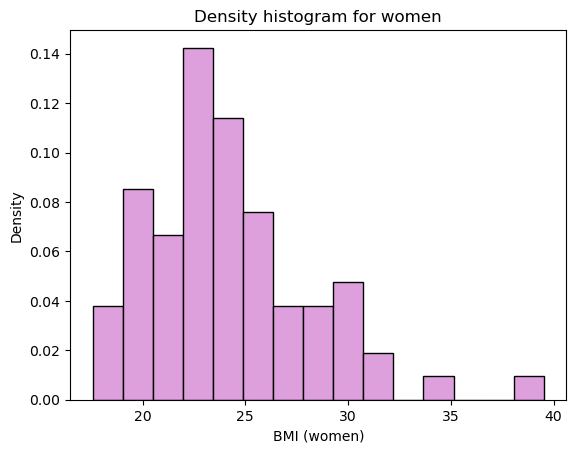

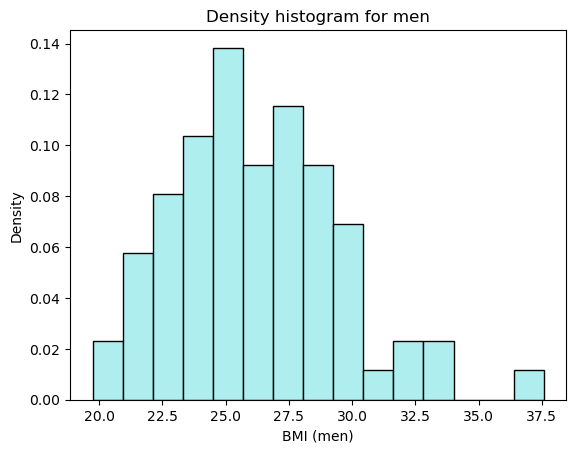

In [337]:
# Density histograms describing the empirical density of BMI for Women and Men

# Density histogram for women
plt.hist(D_female['bmi'], bins=15, density=True, color='plum', edgecolor='black')
plt.xlabel('BMI (women)')
plt.ylabel('Density')
plt.title('Density histogram for women')
plt.show()

# Density histogram for men
plt.hist(D_male['bmi'], bins=15, density=True, color='paleturquoise', edgecolor='black')
plt.xlabel('BMI (men)')
plt.ylabel('Density')
plt.title('Density histogram for men')
plt.show()

# Combined in one plot
# plt.hist(D_female['bmi'], bins = 15,density=True, color = 'red', edgecolor = 'black', alpha = 0.5)
# plt.hist(D_male['bmi'], bins = 15,density=True, color = 'blue', edgecolor = 'black', alpha = 0.5)
# plt.show()


#### d) Boxplot by genders

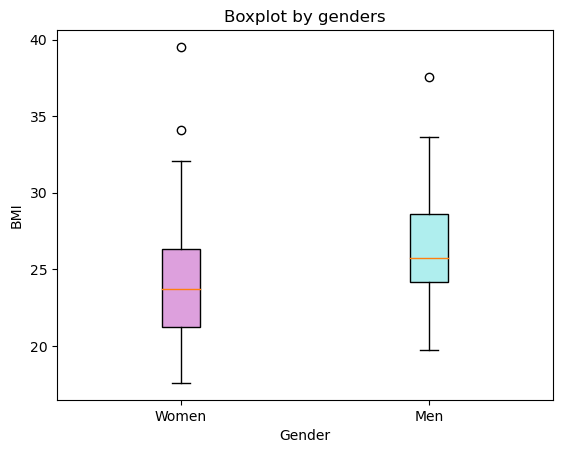

In [338]:
# Boxplot of BMI seperated into genders
box = plt.boxplot([D_female['bmi'], D_male['bmi']], patch_artist=True)
colors = ['plum', 'paleturquoise']

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.xticks([1, 2], ['Women', 'Men'])
plt.title('Boxplot by genders')
plt.ylabel('BMI')
plt.xlabel('Gender')

plt.show()


#### e) Key summary statistics for BMI

In [339]:
# Number of observations in total. Do not include any missing observations.
print("Total number of observations: ", D[D['bmi'].isna()==False].shape[0])

# Sample mean (not split)
print("Sample mean for BMI: ", D['bmi'].mean(skipna=True))

# Sample variance (not split)
print("Sample variance for BMI: ", D['bmi'].var(skipna=True, ddof=1))
## Etc.
# "skipna=True" means that missing values are ignored and the statistic can still be calculated
# If there are missing values.
# If skipna=False the function will return NaN if there are missing values in the data set.


Total number of observations:  145
Sample mean for BMI:  25.24794773689321
Sample variance for BMI:  14.686084905200737


#### f) QQ-plot for model validation

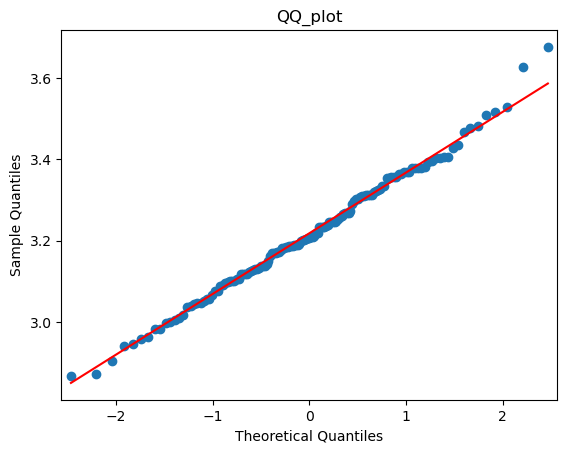

In [340]:
# New variable 'logbmi' with log-transformed BMI
D['logbmi'] = np.log(D['bmi'])

# QQ-plot for log-transformed BMI
sm.qqplot(D['logbmi'],line='q')
plt.title('QQ_plot')
plt.show()



#### g-h) One-sample t-test

In [341]:
# T-test for one sample on log-transformed BMI
res = stats.ttest_1samp(D['logbmi'], popmean = np.log(25))
print("t-obs: ", res[0])
print("p-value: ", res[1])

# Confidence interval directly from t-test
print(res.confidence_interval())


t-obs:  -0.0999127408580046
p-value:  0.9205525650211788
ConfidenceInterval(low=3.193202900926161, high=3.242078180778354)


In [329]:
# import numpy as np
# import scipy.stats as stats

# # Assuming 'D' is a DataFrame and 'logbmi' is the column containing log-transformed BMI values
# logbmi_data = D['logbmi']

# # T-test for one sample on log-transformed BMI
# popmean = np.log(25)
# res = stats.ttest_1samp(logbmi_data, popmean)
# print("t-obs: ", res.statistic)
# print("p-value: ", res.pvalue)

# # Sample statistics
# n = len(logbmi_data)
# mean_logbmi = np.mean(logbmi_data)
# std_err = np.std(logbmi_data, ddof=1) / np.sqrt(n)

# # Confidence interval for 95% confidence level
# confidence_level = 0.95
# alpha = 1 - confidence_level
# t_critical = stats.t.ppf(1 - alpha/2, df=n-1)  # t-critical value for two-tailed test

# # Calculating the confidence interval
# margin_of_error = t_critical * std_err
# conf_interval = (mean_logbmi - margin_of_error, mean_logbmi + margin_of_error)
# print(f"Confidence interval for log-transformed BMI: {conf_interval}")

# # Converting the confidence interval back to real BMI values
# real_bmi_conf_interval = (np.exp(conf_interval[0]), np.exp(conf_interval[1]))
# print(f"Confidence interval for real BMI: {real_bmi_conf_interval}")


i) 

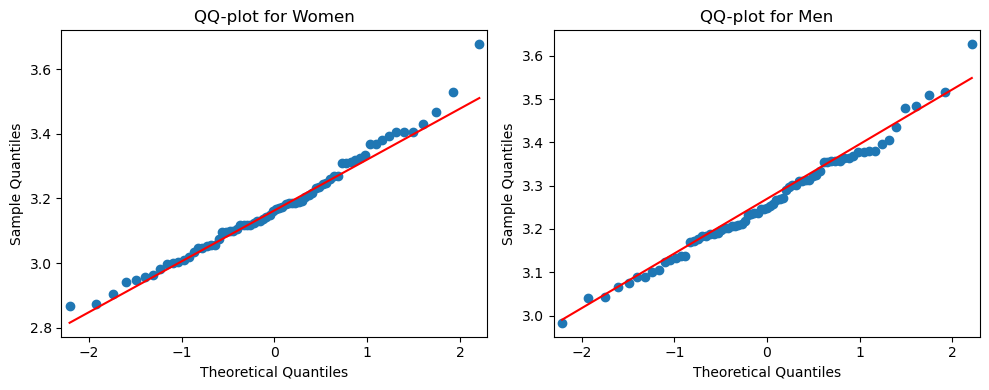

In [350]:
D_female = D_female.copy()
D_male = D_male.copy()

# Log-transformer BMI for både kvinder og mænd
D_female['logbmi'] = np.log(D_female['bmi'])
D_male['logbmi'] = np.log(D_male['bmi'])

# Lav QQ-plots for hver køn
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# QQ-plot for kvinder
sm.qqplot(D_female['logbmi'], line='q', ax=axs[0])
axs[0].set_title("QQ-plot for Women")

# QQ-plot for mænd
sm.qqplot(D_male['logbmi'], line='q', ax=axs[1])
axs[1].set_title("QQ-plot for Men")

# Vis plottene
plt.tight_layout()
plt.show()

#### j) Confidence interval (CI) for mean and median

In [343]:
# Using sample for women only
D_female = D[D['gender']==0]
n = D_female.shape[0]
std_err = np.std(D_female['logbmi'],ddof=1)/np.sqrt(n)

# CI for mean of logBMI for women
KI = stats.t.interval(0.95, df=n-1, loc=D_female['logbmi'].mean(),scale=std_err)
print("95% CI for mean of logBMI for women: ", KI)

# Transform back to get CI for median BMI for women
print("95% CI for median BMI for women: ", np.exp(KI))

95% CI for mean of logBMI for women:  (3.1365251201756505, 3.2116686703371817)
95% CI for median BMI for women:  [23.02372302 24.82046887]


#### k) Welch t-test

In [349]:
# Comparison of logBMI for women and men
D_male = D[D['gender'] == 1]
res = stats.ttest_ind(D_female['logbmi'],D_male['logbmi'], equal_var=False)
print("t-obs: ", res[0])
print("p-value: ", res[1])

t-obs:  -3.6374526305970956
p-value:  0.00039196478151182137


#### m) Correlation

In [345]:
# Correlation between chosen variables
print(D[['weight', 'fastfood', 'bmi']].corr())




            weight  fastfood       bmi
weight    1.000000  0.279322  0.828261
fastfood  0.279322  1.000000  0.153158
bmi       0.828261  0.153158  1.000000


Correlation matrix:
            weight  fastfood       bmi
weight    1.000000  0.279322  0.828261
fastfood  0.279322  1.000000  0.153158
bmi       0.828261  0.153158  1.000000


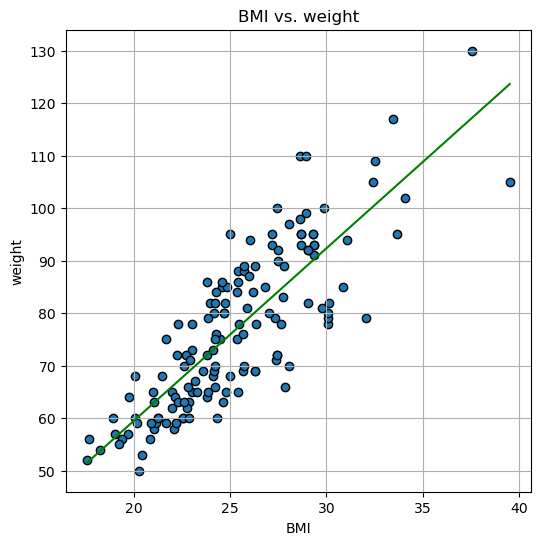

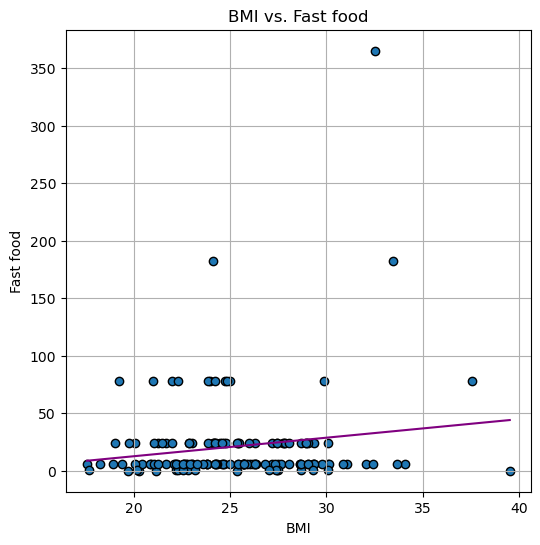

In [356]:
# Calculate the correlation matrix
print("Correlation matrix:")
print(D[['weight', 'fastfood', 'bmi']].corr())

BMI = D['bmi']
Weight = D['weight']
Fastfood = D['fastfood']

# 1. QQ-plot for BMI vs. Weight
plt.figure(figsize=(6, 6))
plt.scatter(BMI, Weight, edgecolor='black')
plt.plot(np.unique(BMI), np.poly1d(np.polyfit(BMI, Weight, 1))(np.unique(BMI)), color='green')
plt.title("BMI vs. weight")
plt.xlabel("BMI")
plt.ylabel("weight")
plt.grid(True)
plt.show()

# 2. QQ-plot for BMI vs. Fast food
plt.figure(figsize=(6, 6))
plt.scatter(BMI, Fastfood, edgecolor='black')
plt.plot(np.unique(BMI), np.poly1d(np.polyfit(BMI, Fastfood, 1))(np.unique(BMI)), color='purple')
plt.title("BMI vs. Fast food")
plt.xlabel("BMI")
plt.ylabel("Fast food")
plt.grid(True)
plt.show()


## EXTRA

#### Subsets in Python

In [216]:
## Extra information about picking out subsets in Python
#
# Logical vector with TRUE or FALSE for every value in a column in D,
# for example: Find all women in the dataframe
women = D['gender'] == 0
print("Logical vector: \n", women)
# This logical vector can then be used to pick out all women (values where women = TRUE)
print("Using logical vector:")
display(D[women])
# Alternatively you can use the pandas function .loc
print("Using .loc:")
display(D.loc[D['gender'] == 0, :]) # ":" means all columns
# More complex logical expressions kan be used, for example:
# Find all women under 55 kg:
print("Women under 55 kg:")
women_under_55kg = (D['gender'] == 0) & (D['weight'] < 55)
display(D[women_under_55kg])

## DISPLAY function gives a nicer table than print. This is especially useful when we 
# are working with dataframes (pandas)

Logical vector: 
 0      False
1      False
2      False
3       True
4      False
       ...  
140     True
141    False
142     True
143     True
144     True
Name: gender, Length: 145, dtype: bool
Using logical vector:


,height,weight,gender,urbanity,fastfood,bmi,logbmi,femlogbmi,malelogbmi
3,168,60,0,4,24.0,21.258503,3.056757,3.056757,NaN
5,161,78,0,3,6.0,30.091432,3.404240,3.404240,NaN
6,168,82,0,2,6.0,29.053288,3.369132,3.369132,NaN
7,166,58,0,2,24.0,21.048048,3.046808,3.046808,NaN
9,172,52,0,1,6.0,17.577069,2.866595,2.866595,NaN
...,...,...,...,...,...,...,...,...,...
136,167,65,0,5,6.0,23.306680,3.148740,3.148740,NaN
140,162,69,0,2,6.0,26.291724,3.269254,3.269254,NaN
142,170,70,0,4,6.0,24.221453,3.187239,3.187239,NaN
143,178,56,0,5,1.0,17.674536,2.872125,2.872125,NaN


Using .loc:


,height,weight,gender,urbanity,fastfood,bmi,logbmi,femlogbmi,malelogbmi
3,168,60,0,4,24.0,21.258503,3.056757,3.056757,NaN
5,161,78,0,3,6.0,30.091432,3.404240,3.404240,NaN
6,168,82,0,2,6.0,29.053288,3.369132,3.369132,NaN
7,166,58,0,2,24.0,21.048048,3.046808,3.046808,NaN
9,172,52,0,1,6.0,17.577069,2.866595,2.866595,NaN
...,...,...,...,...,...,...,...,...,...
136,167,65,0,5,6.0,23.306680,3.148740,3.148740,NaN
140,162,69,0,2,6.0,26.291724,3.269254,3.269254,NaN
142,170,70,0,4,6.0,24.221453,3.187239,3.187239,NaN
143,178,56,0,5,1.0,17.674536,2.872125,2.872125,NaN


Women under 55 kg:


,height,weight,gender,urbanity,fastfood,bmi,logbmi,femlogbmi,malelogbmi
9,172,52,0,1,6.0,17.577069,2.866595,2.866595,NaN
24,157,50,0,2,0.0,20.284799,3.009872,3.009872,NaN
45,161,53,0,3,6.0,20.446742,3.017824,3.017824,NaN
66,172,54,0,3,6.0,18.253110,2.904335,2.904335,NaN


#### Additional Python tips

In [217]:
## Make a for-loop for calculating some summary statistics
## and save in a new dataframe
Tbl = pd.DataFrame()
for i in [0,1]:
    Tbl.loc[i, "mean"] = D[D['gender'] == i]['bmi'].mean()
    Tbl.loc[i, "var"] = D[D['gender'] == i]['bmi'].var()

Tbl.index = ['Women', 'Men'] # Nameing rows

# show Tbl (dataframe)
display(Tbl)


,mean,var
Women,24.216402,16.417873
Men,26.265363,11.068725


In [218]:
# There are many ways to reach the same restults, and some have more compact commands/functions:
# For example:
result = D.groupby('gender')['bmi'].agg(['mean', 'var'])
# Here the groupby function is used to group the data by gender, and then the agg (aggregate) function
# for calculating mean and variance for BMI for each group.
display(result)

# See more functions in pandas documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html
# Numpy documentation: https://numpy.org/doc/stable/reference/index.html
# Or find documentation/guides for other python packages/functions online.


,mean,var
gender,,
0,24.216402,16.417873
1,26.265363,11.068725


#### Latex Tips
Pandas (pd) also includes a function that is very handy for writing tables/dataframes directly into Latex-code. 
This is done by usind the function `pd.to_latex()`.
The following is the simplest form of the function:

In [219]:
Tbl_latex = Tbl.to_latex()
print(Tbl_latex)

\begin{tabular}{lrr}
\toprule
 & mean & var \\
\midrule
Women & 24.216402 & 16.417873 \\
Men & 26.265363 & 11.068725 \\
\bottomrule
\end{tabular}



In [355]:

Correlation = D[['weight', 'fastfood', 'bmi']].corr()
Correlation = Correlation.to_latex()
print(Correlation)


\begin{tabular}{lrrr}
\toprule
 & weight & fastfood & bmi \\
\midrule
weight & 1.000000 & 0.279322 & 0.828261 \\
fastfood & 0.279322 & 1.000000 & 0.153158 \\
bmi & 0.828261 & 0.153158 & 1.000000 \\
\bottomrule
\end{tabular}

